In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
from pprint import pprint
import pandas as pd
import os
import json
import numpy as np
import pandas
from tslearn.piecewise import PiecewiseAggregateApproximation

/home/bruna/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
hits = pd.read_csv(r"dataset/spotify_hits_dataset_complete.csv", error_bad_lines=False, sep='\t', encoding='utf-8')
hits.head()

/home/bruna/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,7offICpl9kla5kC61uUAs9,Bate Palma,"['5GqnSMX8p2hxqsM6LqDty3', '0jTDeBJQr3unrK29Lk...","['MC JottaPê', 'Lexa']",50,False,Collaboration,1,2,181,...,4,0.626,0.857,0.685,0.0,0.206,-4.840,0.3800,0.8370,150.052
1,1dLXLETYiZohIZWnse4ypG,Better,['5ZsFI1h6hIdQRw2ti0hz81'],['ZAYN'],68,False,Solo,1,1,183,...,4,0.353,0.637,0.418,0.0,0.131,-7.137,0.3010,0.0807,84.295
2,79Uf0vVa7HwWKSgdpTwtRm,Século 21,"['7KVJCU4z5L4EUHILL8aMxR', '4PzYKhC14sTJNEr0dz...","['Leo Santana', 'Luísa Sonza']",50,True,Collaboration,5,2,184,...,4,0.456,0.832,0.769,0.0,0.407,-7.023,0.0578,0.7240,132.972
3,3U4isOIWM3VvDubwSI3y7a,All of Me,['5y2Xq6xcjJb2jVM54GHK3t'],['John Legend'],88,False,Solo,6,1,184,...,4,0.922,0.422,0.264,0.0,0.132,-7.064,0.0322,0.3310,119.930
4,78kar2tZk7655xZMibzXO3,Oi,['5D56dZmhE9DgT01XixdHiD'],['Lagum'],63,False,Solo,4,1,184,...,4,0.296,0.807,0.560,0.0,0.101,-9.356,0.0459,0.7250,134.093


In [3]:
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join('primeiro_2021', x)),
                        os.listdir('primeiro_2021') ))

In [4]:
danceability_medias = []
valence_medias = []
energy_medias = []
tempo_medias = []
dates = []
danceability_median = []
valence_median = []
energy_median = []
tempo_median = []

In [6]:
directory = 'primeiro_2021'
for filename in list_of_files:
    if filename.endswith(".csv"):
        danceability_week = []
        valence_week = []
        energy_week = []
        tempo_week = []
        path = directory + '/' + filename
        chart = pd.read_csv(path, encoding='utf-8', delimiter='\t')
        for i in chart['ID']:
            for idx, song_id in enumerate(hits['song_id']):
                if i == song_id:
                    danceability_week.append(hits.loc[idx, 'danceability'])
                    valence_week.append(hits.loc[idx, 'valence'])
                    energy_week.append(hits.loc[idx, 'energy'])
                    tempo_week.append(hits.loc[idx, 'tempo'])
                    ates = pd.to_datetime(dates)
        dates.append(filename[18:28])
        
        danceability_medias.append(np.mean(danceability_week))
        valence_medias.append(np.mean(valence_week))
        energy_medias.append(np.mean(energy_week))
        tempo_medias.append(np.mean(tempo_week))
        
        danceability_median.append(np.median(danceability_week))
        valence_median.append(np.median(valence_week))
        energy_median.append(np.median(energy_week))
        tempo_median.append(np.median(tempo_week))

In [7]:
dates = pd.to_datetime(dates)

In [8]:
df = pd.DataFrame(list(zip(dates, danceability_medias, danceability_median, valence_medias, valence_median, energy_medias, energy_median, tempo_medias, tempo_median)), 
                     columns=['Data', 'DanceabilityMedia', 'DanceabilityMedian','ValenceMedia', 'ValenceMedian', 'EnergyMedia', 'EnergyMedian', 'TempoMedia', 'TempoMedian'])
df.head(20)

,Data,DanceabilityMedia,DanceabilityMedian,ValenceMedia,ValenceMedian,EnergyMedia,EnergyMedian,TempoMedia,TempoMedian
0,2021-01-01,0.688723,0.6790,0.705170,0.7190,0.754718,0.7730,135.619479,134.4990
1,2021-01-02,0.685485,0.6770,0.691106,0.7055,0.737136,0.7565,133.248040,131.9070
2,2021-01-03,0.685823,0.6790,0.690571,0.7055,0.734753,0.7520,132.989157,131.1660
3,2021-01-04,0.693199,0.6965,0.655912,0.6785,0.709097,0.7265,128.118444,129.6975
4,2021-01-05,0.695541,0.6965,0.654703,0.6780,0.708740,0.7280,127.767612,128.7970
5,2021-01-05,0.695541,0.6965,0.654703,0.6780,0.708740,0.7280,127.767612,128.7970
6,2021-01-06,0.692612,0.6950,0.653090,0.6780,0.707061,0.7245,128.064143,129.5940
7,2021-01-07,0.690327,0.6885,0.654677,0.6785,0.710786,0.7265,128.493332,129.6360
8,2021-01-08,0.694495,0.6930,0.672393,0.6950,0.715066,0.7265,129.344081,129.9845
9,2021-01-09,0.691298,0.6865,0.693682,0.7100,0.732606,0.7500,132.408662,131.1660


In [9]:
for idx, x in enumerate(dates):
    print(idx, x)

0 2021-01-01 00:00:00
1 2021-01-02 00:00:00
2 2021-01-03 00:00:00
3 2021-01-04 00:00:00
4 2021-01-05 00:00:00
5 2021-01-05 00:00:00
6 2021-01-06 00:00:00
7 2021-01-07 00:00:00
8 2021-01-08 00:00:00
9 2021-01-09 00:00:00
10 2021-01-10 00:00:00
11 2021-01-12 00:00:00
12 2021-01-13 00:00:00
13 2021-01-14 00:00:00
14 2021-01-15 00:00:00
15 2021-01-16 00:00:00
16 2021-01-17 00:00:00
17 2021-01-18 00:00:00
18 2021-01-19 00:00:00
19 2021-01-20 00:00:00
20 2021-01-21 00:00:00
21 2021-01-22 00:00:00
22 2021-01-23 00:00:00
23 2021-01-24 00:00:00
24 2021-01-25 00:00:00
25 2021-01-26 00:00:00
26 2021-01-27 00:00:00
27 2021-01-28 00:00:00
28 2021-01-29 00:00:00
29 2021-01-30 00:00:00
30 2021-01-31 00:00:00
31 2021-02-01 00:00:00
32 2021-02-02 00:00:00
33 2021-02-03 00:00:00
34 2021-02-04 00:00:00
35 2021-02-05 00:00:00
36 2021-02-06 00:00:00
37 2021-02-07 00:00:00
38 2021-02-08 00:00:00
39 2021-02-09 00:00:00
40 2021-02-10 00:00:00
41 2021-02-11 00:00:00
42 2021-02-12 00:00:00
43 2021-02-13 00:00:0

# Danceability


Text(0, 0.5, 'Danceability')

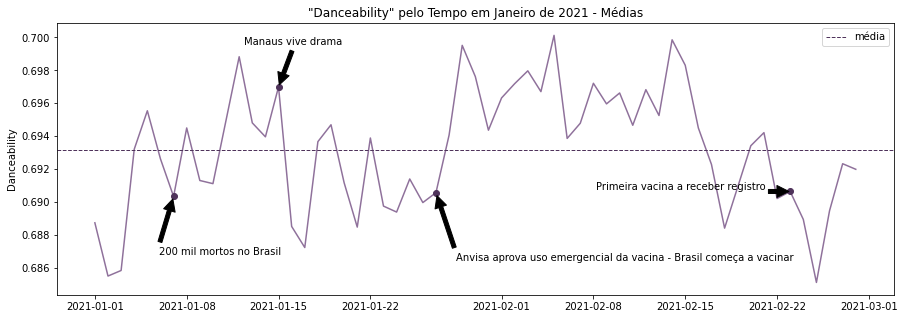

In [15]:
media = np.mean(danceability_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, danceability_medias, color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

ax.plot(dates[7], danceability_medias[7], 'o', color='#4F335B')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], danceability_medias[7]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], danceability_medias[14], 'o', color='#4F335B')
ax.annotate('Manaus vive drama',
            xy=(dates[14], danceability_medias[14]), xycoords='data',
            xytext=(15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[26], danceability_medias[26], 'o', color='#4F335B')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], danceability_medias[26]), xycoords='data',
            xytext=(20, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], danceability_medias[53], 'o', color='#4F335B')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], danceability_medias[53]), xycoords='data',
            xytext=(-25, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Danceability" pelo Tempo em Janeiro de 2021 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

Text(0, 0.5, 'Danceability')

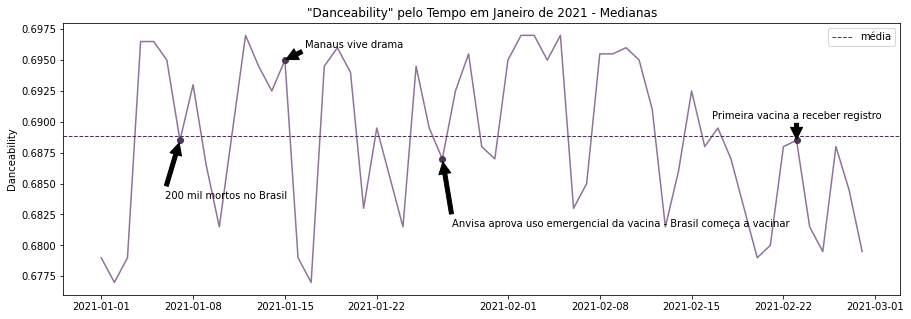

In [24]:
media = np.mean(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, danceability_median, color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

ax.plot(dates[7], danceability_median[7], 'o', color='#4F335B')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], danceability_median[7]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], danceability_median[14], 'o', color='#4F335B')
ax.annotate('Manaus vive drama',
            xy=(dates[14], danceability_median[14]), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], danceability_median[26], 'o', color='#4F335B')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], danceability_median[26]), xycoords='data',
            xytext=(10, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[53], danceability_median[53], 'o', color='#4F335B')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], danceability_median[53]), xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Danceability" pelo Tempo em Janeiro de 2021 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

## Valence 

Text(0, 0.5, 'Valence')

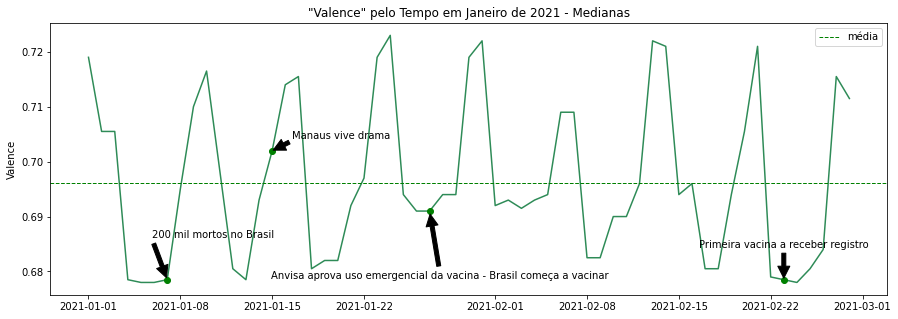

In [28]:
media = np.mean(valence_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, valence_median, color='#2E8B57')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[7], valence_median[7], 'o', color='g')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], valence_median[7]), xycoords='data',
            xytext=(-15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], valence_median[14], 'o', color='g')
ax.annotate('Manaus vive drama',
            xy=(dates[14], valence_median[14]), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], valence_median[26], 'o', color='g')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], valence_median[26]), xycoords='data',
            xytext=(10, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], valence_median[53], 'o', color='g')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], valence_median[53]), xycoords='data',
            xytext=(0, 40), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Valence" pelo Tempo em Janeiro de 2021 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

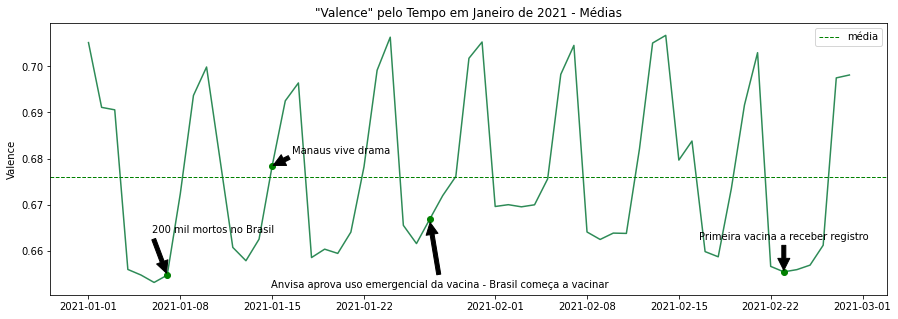

In [29]:
media = np.mean(valence_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, valence_medias, color='#2E8B57')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[7], valence_medias[7], 'o', color='g')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], valence_medias[7]), xycoords='data',
            xytext=(-15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], valence_medias[14], 'o', color='g')
ax.annotate('Manaus vive drama',
            xy=(dates[14], valence_medias[14]), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], valence_medias[26], 'o', color='g')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], valence_medias[26]), xycoords='data',
            xytext=(10, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], valence_medias[53], 'o', color='g')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], valence_medias[53]), xycoords='data',
            xytext=(0, 40), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Valence" pelo Tempo em Janeiro de 2021 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Valence')

## Energy

Text(0, 0.5, 'Energy')

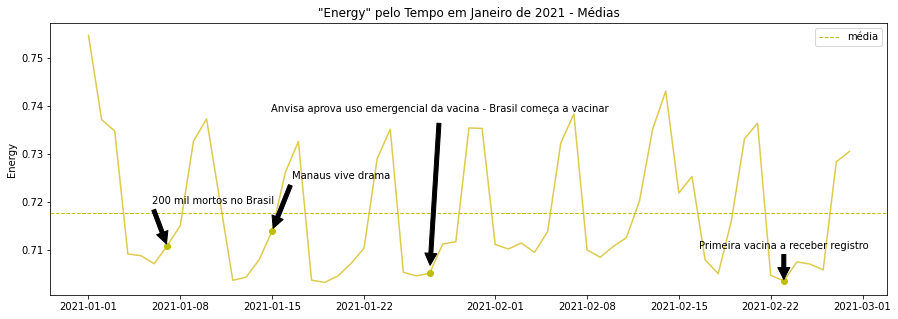

In [38]:
media = np.mean(energy_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, energy_medias, color='#DECA4D')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[7], energy_medias[7], 'o', color='y')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], energy_medias[7]), xycoords='data',
            xytext=(-15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], energy_medias[14], 'o', color='y')
ax.annotate('Manaus vive drama',
            xy=(dates[14], energy_medias[14]), xycoords='data',
            xytext=(20, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], energy_medias[26], 'o', color='y')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], energy_medias[26]), xycoords='data',
            xytext=(10, 170), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], energy_medias[53], 'o', color='y')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], energy_medias[53]), xycoords='data',
            xytext=(0, 40), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Energy" pelo Tempo em Janeiro de 2021 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

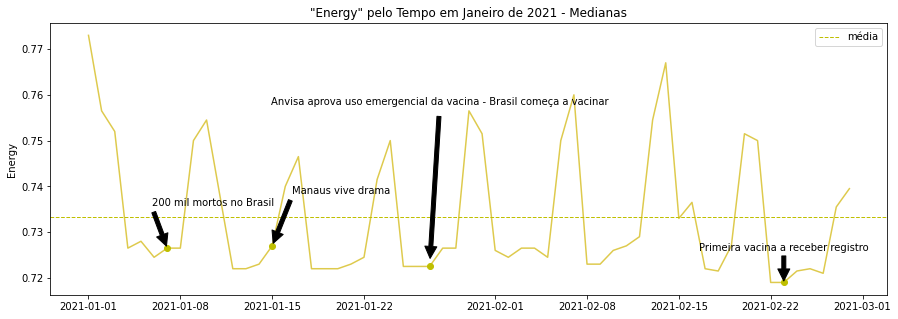

In [39]:
media = np.mean(energy_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, energy_median, color='#DECA4D')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[7], energy_median[7], 'o', color='y')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], energy_median[7]), xycoords='data',
            xytext=(-15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], energy_median[14], 'o', color='y')
ax.annotate('Manaus vive drama',
            xy=(dates[14], energy_median[14]), xycoords='data',
            xytext=(20, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], energy_median[26], 'o', color='y')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], energy_median[26]), xycoords='data',
            xytext=(10, 170), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], energy_median[53], 'o', color='y')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], energy_median[53]), xycoords='data',
            xytext=(0, 40), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Energy" pelo Tempo em Janeiro de 2021 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Energy')

# Tempo

Text(0, 0.5, 'Tempo')

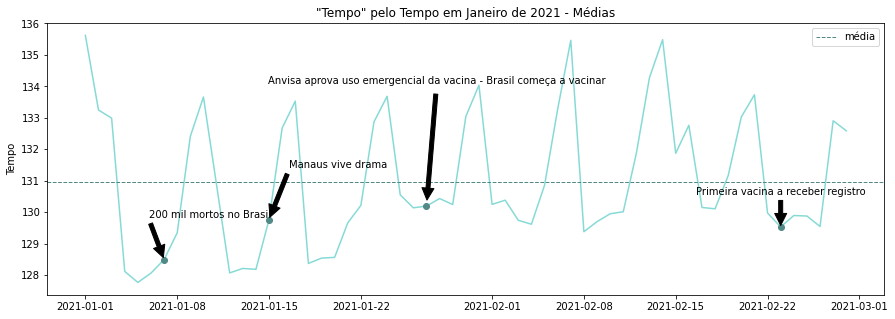

In [41]:
media = np.mean(tempo_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, tempo_medias, color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[7], tempo_medias[7], 'o', color='#518986')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], tempo_medias[7]), xycoords='data',
            xytext=(-15, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[14], tempo_medias[14], 'o', color='#518986')
ax.annotate('Manaus vive drama',
            xy=(dates[14], tempo_medias[14]), xycoords='data',
            xytext=(20, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], tempo_medias[26], 'o', color='#518986')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], tempo_medias[26]), xycoords='data',
            xytext=(10, 130), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], tempo_medias[53], 'o', color='#518986')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], tempo_medias[53]), xycoords='data',
            xytext=(0, 40), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em Janeiro de 2021 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

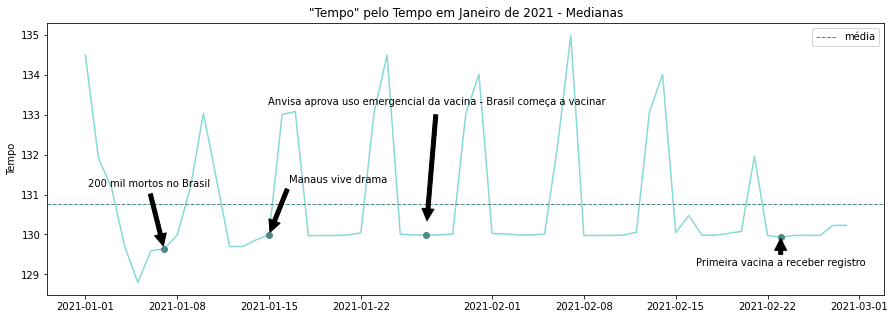

In [46]:
media = np.mean(tempo_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates, tempo_median, color='#86DAD6')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[7], tempo_median[7], 'o', color='#518986')
ax.annotate('200 mil mortos no Brasil',
            xy=(dates[7], tempo_median[7]), xycoords='data',
            xytext=(-15, 70), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[14], tempo_median[14], 'o', color='#518986')
ax.annotate('Manaus vive drama',
            xy=(dates[14], tempo_median[14]), xycoords='data',
            xytext=(20, 60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[26], tempo_median[26], 'o', color='#518986')
ax.annotate('Anvisa aprova uso emergencial da vacina - Brasil começa a vacinar',
            xy=(dates[26], tempo_medias[26]), xycoords='data',
            xytext=(10, 130), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[53], tempo_median[53], 'o', color='#518986')
ax.annotate('Primeira vacina a receber registro',
            xy=(dates[53], tempo_median[53]), xycoords='data',
            xytext=(0, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em Janeiro de 2021 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Tempo')